# Purpose: Dahl Mglur5 Microglia OGD Cell Analysis

### Purpose: To quantify cell features of already segmented microglia images from step 1 in this folder

Created by: Hawley Helmbrecht

Creation Date: 06/4/2021 (Original file)

Edit Date: 10/27/2021 - Change the file to be for Phuongs BeV Analysis rather than the Dahl Mglur5 Project
6/16/21 - Updated for the Mglur5 analysis

*Step 1: Import Necessary Packages*

In [29]:
import numpy as np
import pandas as pd
from scipy import ndimage

import skimage.filters
from skimage import morphology
from skimage.measure import label, regionprops, regionprops_table
from skimage.color import label2rgb
from skimage import io
from skimage import measure
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import segmentation

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import watermark
import os
from PIL import Image

*Step 2: User Inputs*

In [2]:
#replace the example path from my computer with the path to the image on your computer

cell_folder = '/Users/hhelmbre/Desktop/Mglur5_publication_analysis/mean_thresh_array'

file_type = '.npy'

*Step 3: Defining a Folder Cleaner Function to only Return Tif Images*

In [3]:
def folder_cleaner(folder, image_type):
    k=0
    for files in folder:
        if image_type in str(files):
            k+=1
        else:
            folder = np.delete(folder, np.argwhere(folder == str(files)))
    return folder

*Step 4: Get All Images in the Folder*

In [4]:
arr = os.listdir(cell_folder)
file_list = np.asarray(arr)
file_list = folder_cleaner(file_list, file_type)

In [5]:
file_list

array(['351_slide5_slice4_CA2_60x_zstack5_mean_thresh.npy',
       '351_slide5_slice3_CA1_60x_zstack3_mean_thresh.npy',
       '351_slide5_slice5_cortex_60x_zstack1_mean_thresh.npy',
       '238_slide4_slice3_CA1_60x_zstack1_mean_thresh.npy',
       '309_slide5_slice5_CA2_60x_zstack4_mean_thresh.npy',
       '352_slide2_slice4_cortex_60x_zstack4_mean_thresh.npy',
       '363_slide5_slice3_CA3_60x_zstack2_mean_thresh.npy',
       '363_slide5_slice3_cortex_60x_zstack1_mean_thresh.npy',
       '308_slide5_slice5_cortex_60x_zstack2_mean_thresh.npy',
       '352_slide2_slice3_CA2_60x_zstack5_mean_thresh.npy',
       '343_slide7_slice4_cortex_60x_zstack3_mean_thresh.npy',
       '352_slide2_slice4_CA1_60x_zstack3_mean_thresh.npy',
       '309_slide5_slice5_CA1_60x_zstack1_mean_thresh.npy',
       '213_slide5_slice3_CA2_60x_zstack5_mean_thresh.npy',
       '238_slide4_slice4_CA1_60x_zstack2_mean_thresh.npy',
       '337_slide5_slice5_CA1_60x_zstack3_mean_thresh.npy',
       '238_slide4_slice3

*Step 5: Segmenting and Calculating Region Features on All Images*

In [6]:
properties_list = ('area', 'bbox_area', 'centroid', 'convex_area', 
                   'eccentricity', 'equivalent_diameter', 'euler_number', 
                   'extent', 'filled_area', 'major_axis_length', 
                   'minor_axis_length', 'orientation', 'perimeter', 'solidity')


In [ ]:
#Testing the watershed separation

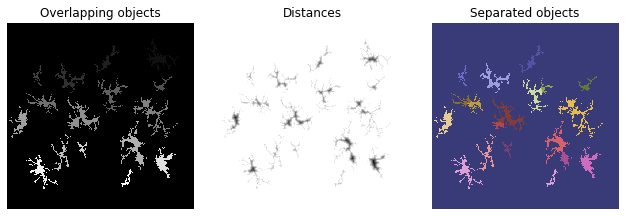

In [49]:
file_name = str(cell_folder + '/' + file_list[0])
new_binary_mean = np.load(file_name)
label_image = label(new_binary_mean)

distance = ndimage.distance_transform_edt(label_image)
coords = peak_local_max(distance, footprint=np.ones((150, 150)), labels=label_image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance, markers, mask=label_image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(label_image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.tab20b)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [ ]:
# testing done

In [10]:
j = 0
for names in file_list:
        file_name = str(cell_folder + '/' + names)
        new_binary_mean = np.load(file_name)
        label_image = label(new_binary_mean)
        
        #Need to add in a separation step here
        
        #Feel free to add them here as well. The computational time is pretty efficient
        props = measure.regionprops_table(label_image, properties=(properties_list))

        if j == 0:
            df = pd.DataFrame(props)
            df['filename'] = names
        else:
            df2 = pd.DataFrame(props)
            df2['filename'] = names
            df = df.append(df2)
        
        #Add in saving the segmentation labeled images

        j = 1

*Step 6: Caculating the Circularity*

In [8]:
df['circularity'] = 4*np.pi*df.area/df.perimeter**2

*Step 7: Calculating the Aspect Ratio*

In [9]:
df['aspect_ratio'] = df.major_axis_length/df.minor_axis_length

*Step 8: Add in a column for the ID*

In [24]:
df

,area,bbox_area,centroid-0,centroid-1,convex_area,eccentricity,equivalent_diameter,euler_number,extent,filled_area,major_axis_length,minor_axis_length,orientation,perimeter,solidity,filename,circularity,aspect_ratio
0,225,448,12.600000,67.542222,309,0.954263,16.925688,1,0.502232,225,33.860110,10.123131,0.185748,79.112698,0.728155,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-6-1-3_li_...,0.451752,3.344826
1,72,100,12.027778,280.847222,84,0.413572,9.574615,1,0.720000,72,10.487680,9.548734,-0.189918,34.520815,0.857143,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-6-1-3_li_...,0.759242,1.098332
2,403,792,31.575682,193.995037,516,0.906654,22.652054,1,0.508838,403,37.585528,15.856375,0.566981,106.154329,0.781008,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-6-1-3_li_...,0.449407,2.370373
3,100,182,27.190000,273.640000,121,0.435580,11.283792,1,0.549451,100,13.075696,11.770088,1.255078,43.455844,0.826446,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-6-1-3_li_...,0.665447,1.110926
4,168,380,37.630952,256.285714,257,0.451601,14.625466,1,0.442105,168,18.136787,16.182009,-0.584992,73.805087,0.653696,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-6-1-3_li_...,0.387567,1.120799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,113,204,337.371681,234.840708,151,0.758914,11.994835,1,0.553922,113,16.089361,10.477250,-0.413308,57.698485,0.748344,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-1-2-3_li_...,0.426540,1.535647
33,614,1595,354.881107,494.070033,1166,0.931300,27.960134,1,0.384953,614,59.401253,21.637090,-0.228159,220.379726,0.526587,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-1-2-3_li_...,0.158867,2.745344
34,111,255,339.702703,360.900901,164,0.810550,11.888212,1,0.435294,111,18.060570,10.577531,1.027748,60.734019,0.676829,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-1-2-3_li_...,0.378154,1.707447
35,91,165,372.406593,379.703297,117,0.807346,10.764051,1,0.551515,91,14.637772,8.637425,0.280021,46.041631,0.777778,EV_MICROGLIA_STUDY_HEALTHY_CONTROL_1-1-2-3_li_...,0.539448,1.694692


*Step 10: Saving as a CSV file*

In [25]:
df.to_csv('/Users/hhelmbre/Desktop/Mglur5_publication_analysis/mean_threshold_quantified_cells.csv')

*Step 11: Print Dependencies and State*

In [26]:
%load_ext watermark

%watermark -v -m -p numpy,pandas,scipy,skimage,matplotlib,wget

%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.8.0

numpy     : 1.17.2
pandas    : 0.25.1
scipy     : 1.3.1
skimage   : 0.17.2
matplotlib: 3.1.1
wget      : 3.2

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Last updated: Wed Oct 27 2021 15:19:20PDT

